In [14]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [15]:
data = pd.read_csv('Company_Data.csv')
data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [4]:
data.columns

Index(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US'],
      dtype='object')

In [5]:
data.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


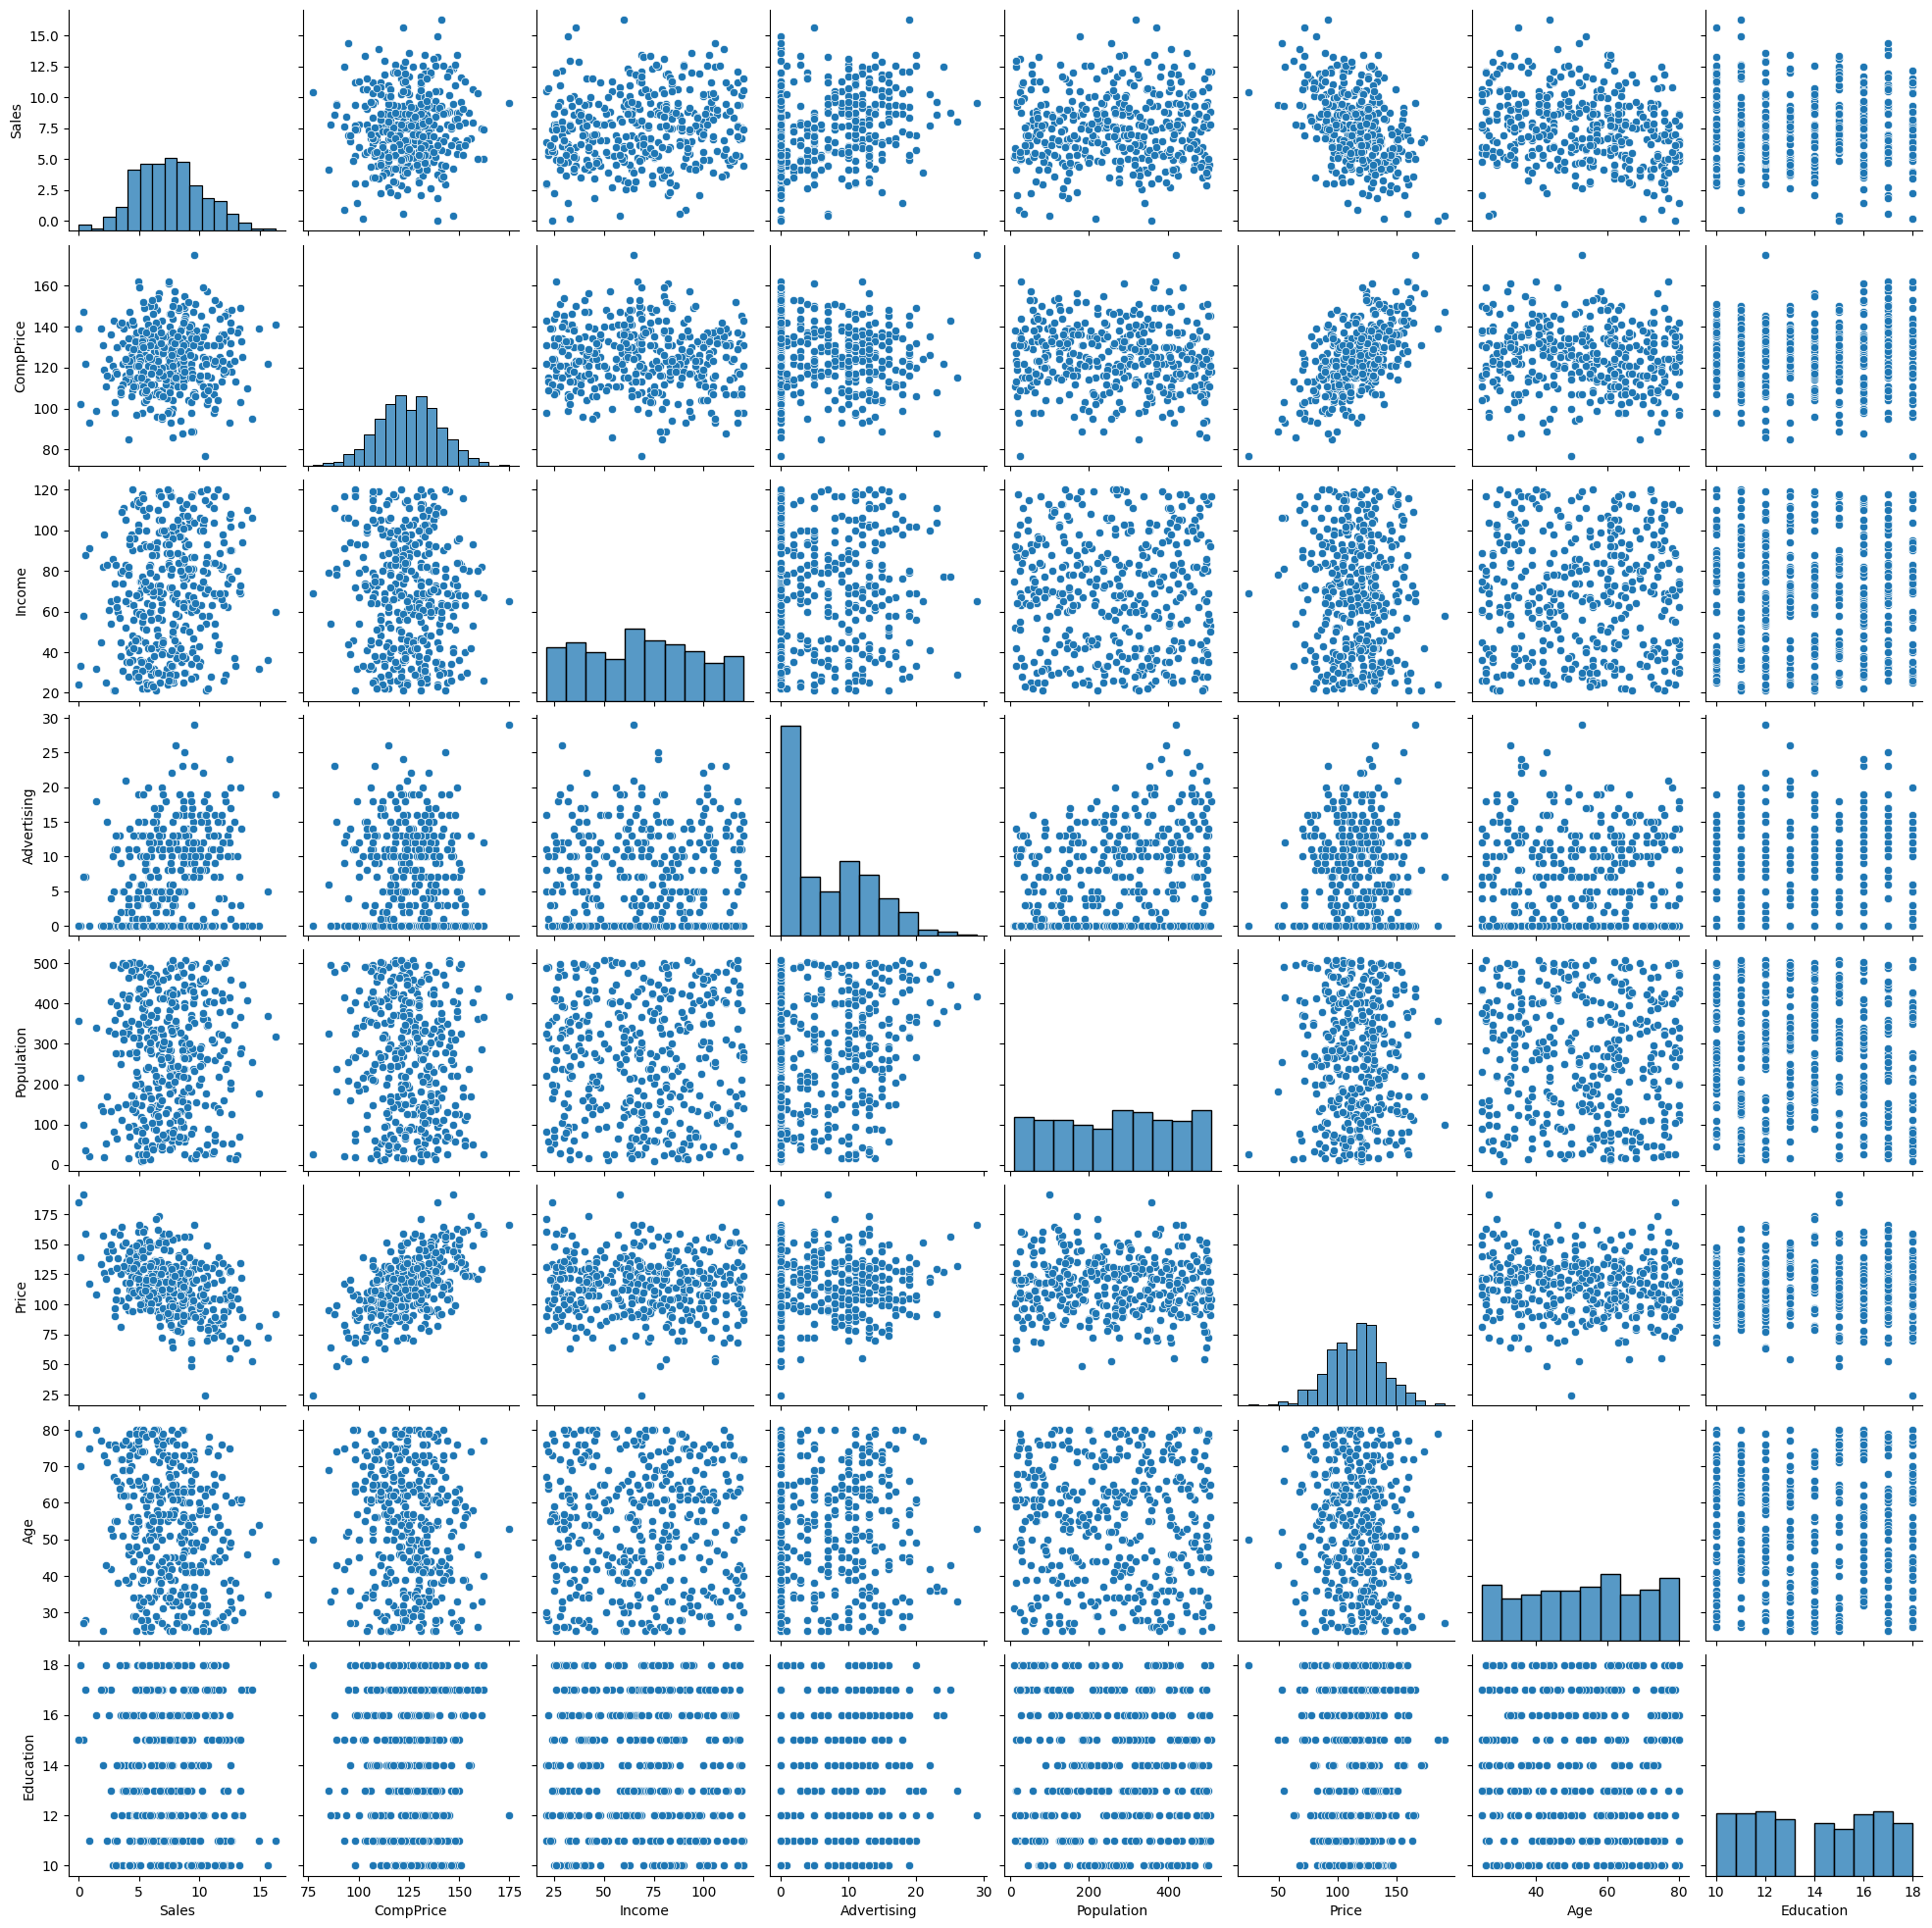

In [6]:
# pairplot
sns.pairplot(data)
plt.show()

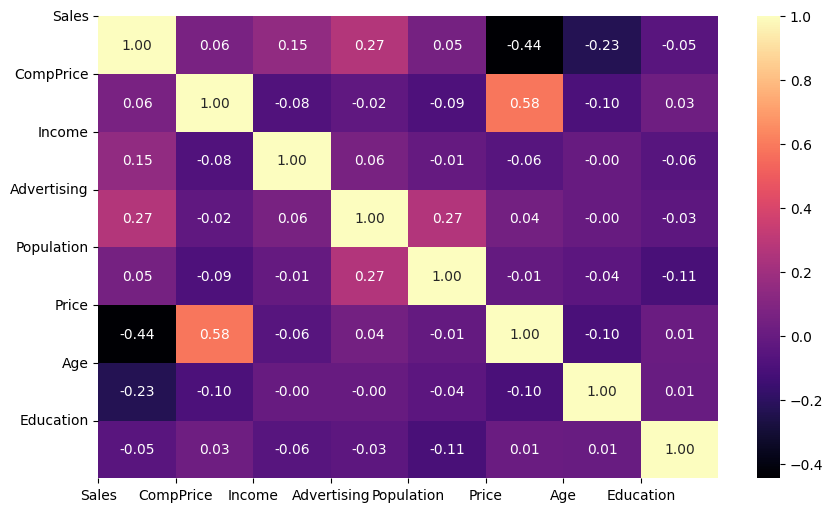

In [7]:
corr = data.corr()
#Plot figsize
fig, ax = plt.subplots(figsize=(10, 6))
#Generate Heat Map, allow annotations and place floats in map
sns.heatmap(corr, cmap='magma', annot=True, fmt=".2f")
#Apply xticks
plt.xticks(range(len(corr.columns)), corr.columns);
#Apply yticks
plt.yticks(range(len(corr.columns)), corr.columns)
#show plot
plt.show()

In [9]:
data['Sales'] = pd.cut(x=data['Sales'],bins=[0, 6, 12, 17], labels=['Low','Medium', 'High'], right = False)
data['Sales']

0      Medium
1      Medium
2      Medium
3      Medium
4         Low
        ...  
395      High
396    Medium
397    Medium
398       Low
399    Medium
Name: Sales, Length: 400, dtype: category
Categories (3, object): ['Low' < 'Medium' < 'High']

In [16]:
import seaborn as sns

<Axes: >

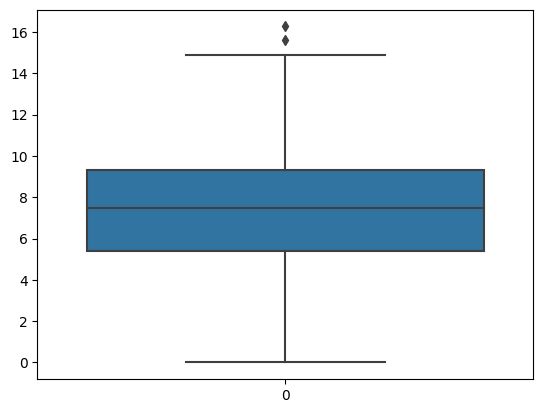

In [17]:
sns.boxplot(data['Sales'])

In [18]:
# as we can see that maximum sale is in between 5-9
# let's categorize sales as High if it is  >=7.5 and low if <7.5
sales_val = []
for value in data['Sales']:
    if value >= 7.5:
        sales_val.append('High')
    else:
        sales_val.append('Low')
data['Sales_category'] = sales_val

In [19]:
data.head()


,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sales_category
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes,High
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes,High
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes,High
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes,Low
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No,Low


In [20]:
data.columns

Index(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US', 'Sales_category'],
      dtype='object')

In [21]:
label_encoder = preprocessing.LabelEncoder()

In [22]:
data['US'] = label_encoder.fit_transform(data['US'])
data['Urban'] = label_encoder.fit_transform(data['Urban'])
data['ShelveLoc'] = label_encoder.fit_transform(data['ShelveLoc'])

In [23]:
data.head(10)

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sales_category
0,9.50,138,73,11,276,120,0,42,17,1,1,High
1,11.22,111,48,16,260,83,1,65,10,1,1,High
2,10.06,113,35,10,269,80,2,59,12,1,1,High
3,7.40,117,100,4,466,97,2,55,14,1,1,Low
4,4.15,141,64,3,340,128,0,38,13,1,0,Low
5,10.81,124,113,13,501,72,0,78,16,0,1,High
6,6.63,115,105,0,45,108,2,71,15,1,0,Low
7,11.85,136,81,15,425,120,1,67,10,1,1,High
8,6.54,132,110,0,108,124,2,76,10,0,0,Low
9,4.69,132,113,0,131,124,2,76,17,0,1,Low


In [24]:
data.head(10)

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sales_category
0,9.50,138,73,11,276,120,0,42,17,1,1,High
1,11.22,111,48,16,260,83,1,65,10,1,1,High
2,10.06,113,35,10,269,80,2,59,12,1,1,High
3,7.40,117,100,4,466,97,2,55,14,1,1,Low
4,4.15,141,64,3,340,128,0,38,13,1,0,Low
5,10.81,124,113,13,501,72,0,78,16,0,1,High
6,6.63,115,105,0,45,108,2,71,15,1,0,Low
7,11.85,136,81,15,425,120,1,67,10,1,1,High
8,6.54,132,110,0,108,124,2,76,10,0,0,Low
9,4.69,132,113,0,131,124,2,76,17,0,1,Low


In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sales           400 non-null    float64
 1   CompPrice       400 non-null    int64  
 2   Income          400 non-null    int64  
 3   Advertising     400 non-null    int64  
 4   Population      400 non-null    int64  
 5   Price           400 non-null    int64  
 6   ShelveLoc       400 non-null    int64  
 7   Age             400 non-null    int64  
 8   Education       400 non-null    int64  
 9   Urban           400 non-null    int64  
 10  US              400 non-null    int64  
 11  Sales_category  400 non-null    object 
dtypes: float64(1), int64(10), object(1)
memory usage: 37.6+ KB


In [26]:
colnames = list(data.columns)

In [27]:
colnames

['Sales',
 'CompPrice',
 'Income',
 'Advertising',
 'Population',
 'Price',
 'ShelveLoc',
 'Age',
 'Education',
 'Urban',
 'US',
 'Sales_category']

In [28]:
# splitting data into test and train
x = data.iloc[:,1:11]
x.head()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,138,73,11,276,120,0,42,17,1,1
1,111,48,16,260,83,1,65,10,1,1
2,113,35,10,269,80,2,59,12,1,1
3,117,100,4,466,97,2,55,14,1,1
4,141,64,3,340,128,0,38,13,1,0


In [29]:
y = data['Sales_category']
y.head()

0    High
1    High
2    High
3     Low
4     Low
Name: Sales_category, dtype: object

In [30]:
y.value_counts()

Low     201
High    199
Name: Sales_category, dtype: int64

In [31]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=40)


In [32]:
# model building
# Model 1
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

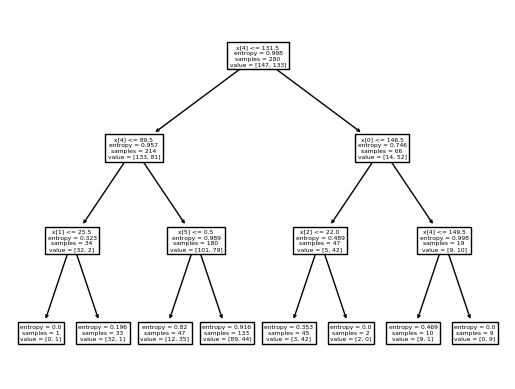

In [33]:
#PLot the decision tree
tree.plot_tree(model);

In [34]:
x.columns

Index(['CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US'],
      dtype='object')

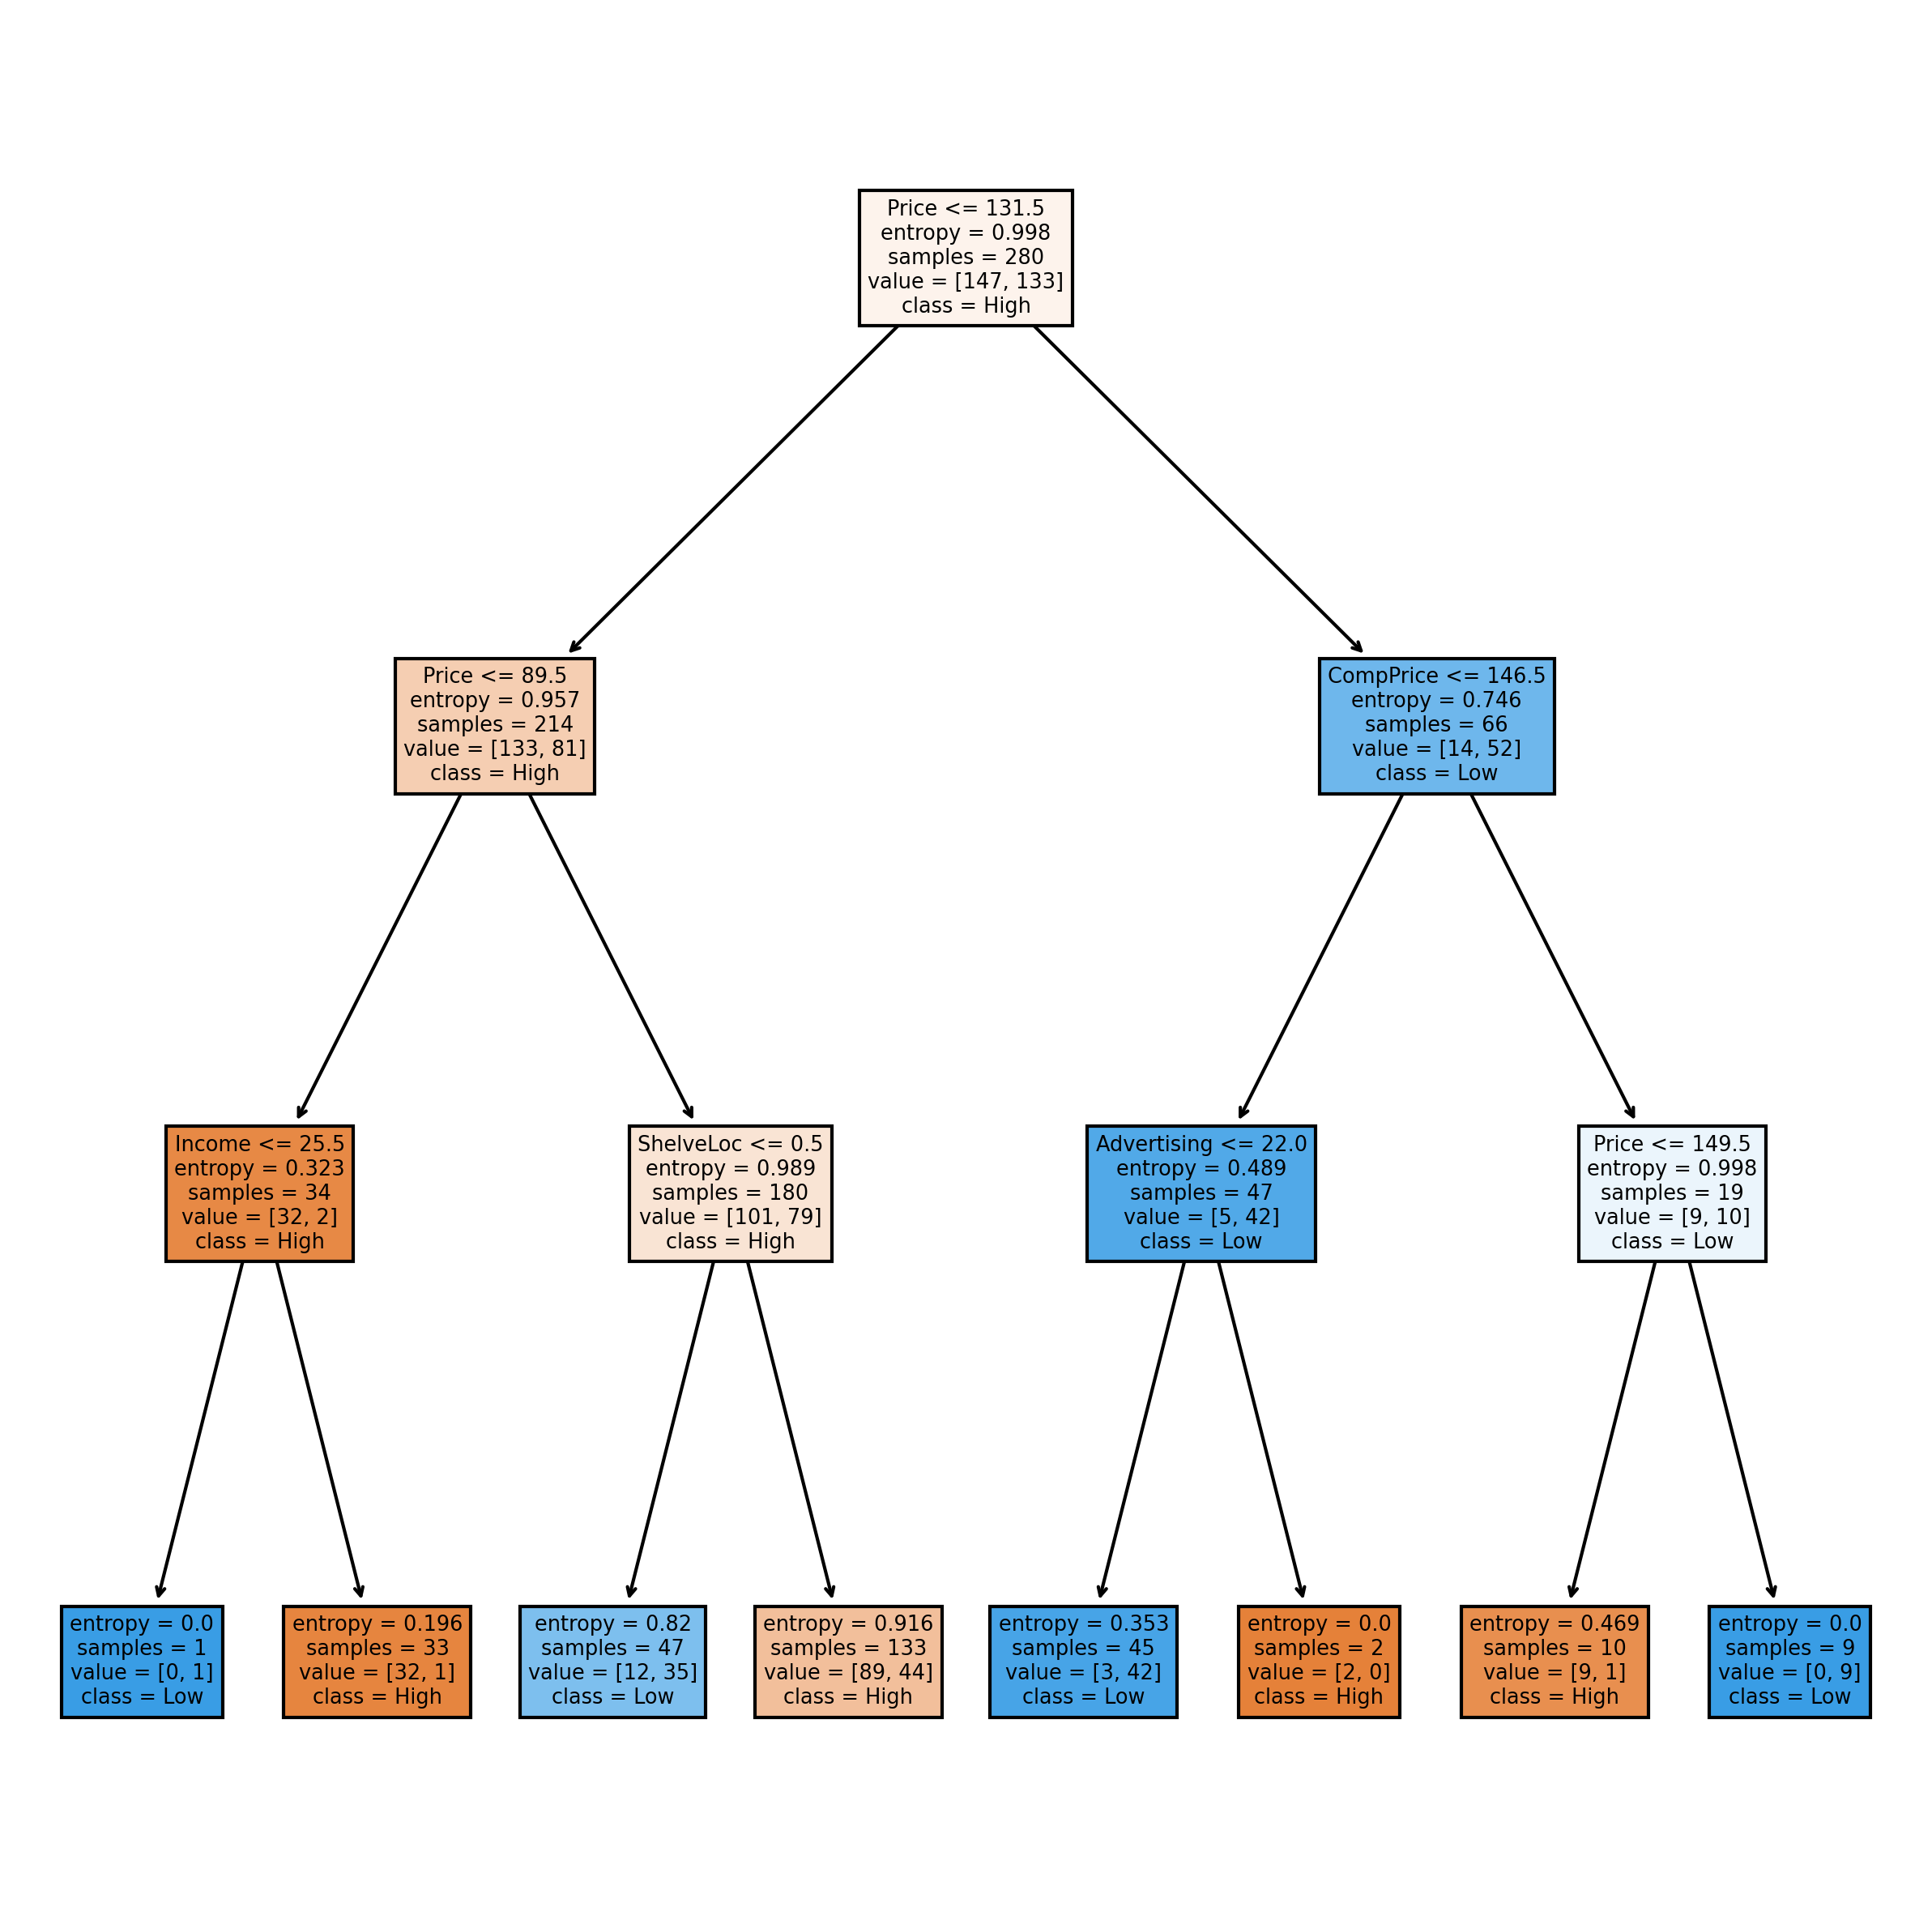

In [35]:
fn= ['CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US']
cn=['High','Low']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (10,10), dpi=300)
tree.plot_tree(model,
               feature_names = fn,
               class_names=cn,
               filled = True);

In [36]:
# prediction
pred = model.predict(x_test)
pd.Series(pred).value_counts()

High    78
Low     42
dtype: int64

In [37]:
pred

array(['Low', 'High', 'Low', 'High', 'High', 'High', 'High', 'High',
       'High', 'High', 'Low', 'High', 'High', 'High', 'High', 'Low',
       'High', 'High', 'High', 'Low', 'High', 'High', 'High', 'High',
       'Low', 'High', 'High', 'Low', 'High', 'High', 'High', 'Low',
       'High', 'High', 'Low', 'High', 'Low', 'Low', 'High', 'High', 'Low',
       'Low', 'Low', 'High', 'High', 'Low', 'Low', 'High', 'High', 'Low',
       'Low', 'High', 'High', 'High', 'Low', 'Low', 'High', 'High',
       'High', 'Low', 'Low', 'High', 'High', 'High', 'Low', 'High',
       'High', 'Low', 'Low', 'High', 'High', 'High', 'High', 'High',
       'High', 'High', 'Low', 'High', 'Low', 'Low', 'High', 'High', 'Low',
       'Low', 'High', 'High', 'High', 'High', 'Low', 'High', 'Low', 'Low',
       'High', 'Low', 'High', 'High', 'High', 'High', 'Low', 'Low',
       'High', 'High', 'High', 'High', 'Low', 'Low', 'Low', 'High',
       'High', 'Low', 'High', 'High', 'High', 'Low', 'High', 'Low',
       'High', '

In [38]:
pd.crosstab(y_test,pred)

col_0,High,Low
Sales_category,,
High,44,8
Low,34,34


In [39]:
np.mean(pred==y_test)

0.65

In [40]:
# accuracy = 65%
# Model 2

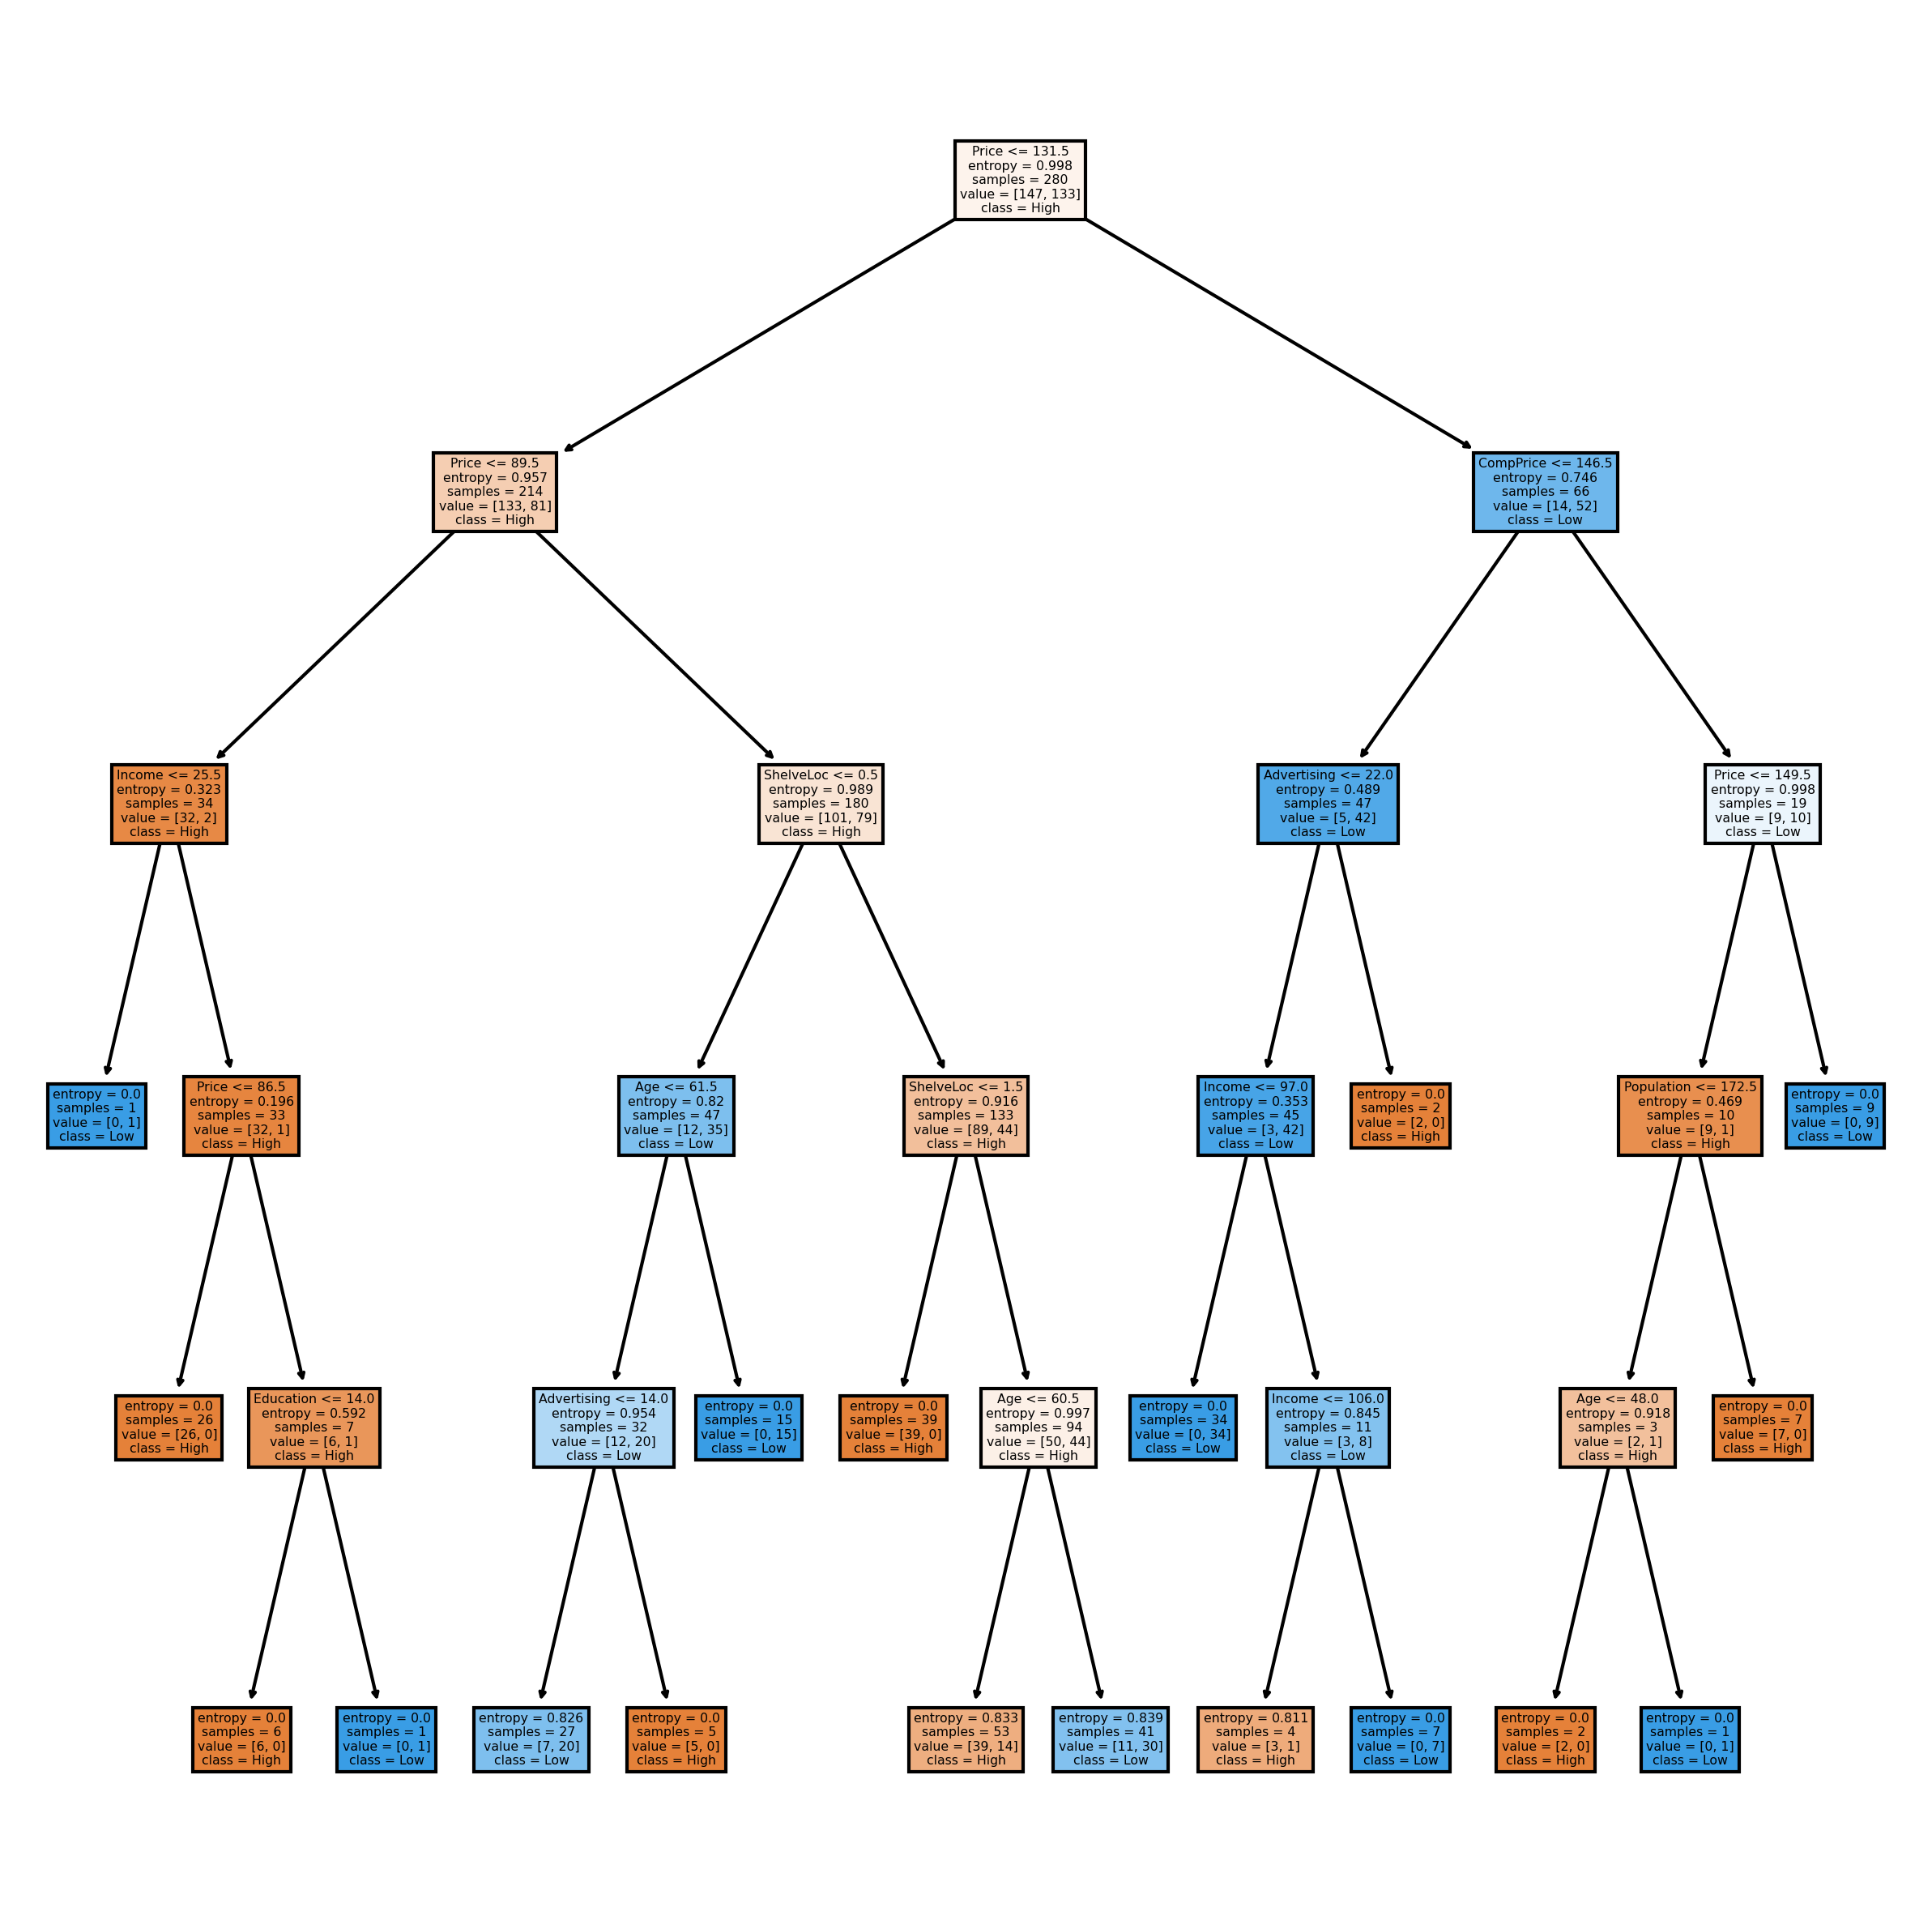

In [41]:
model2 = DecisionTreeClassifier(criterion = 'entropy',max_depth=5)
model2.fit(x_train,y_train)
fn= ['CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US']
cn=['High','Low']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (10,10), dpi=300)
tree.plot_tree(model2,
               feature_names = fn,
               class_names=cn,
               filled = True);

In [42]:
pred2 = model2.predict(x_test)
pd.Series(pred2).value_counts()

Low     69
High    51
dtype: int64

In [44]:
np.mean(pred2==y_test)

0.675

In [46]:
# accuracy increased to 67%
# categorizing Sales value as High , Mid and Low

sales_val2 = []
for value in data['Sales']:
    if value >= 9:
        sales_val2.append('High')
    elif value >= 6 and value < 9:
        sales_val2.append('Mid')
    else:
        sales_val2.append('Low')
data['Sales_category2'] = sales_val2

In [47]:
data.head()


,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sales_category,Sales_category2
0,9.50,138,73,11,276,120,0,42,17,1,1,High,High
1,11.22,111,48,16,260,83,1,65,10,1,1,High,High
2,10.06,113,35,10,269,80,2,59,12,1,1,High,High
3,7.40,117,100,4,466,97,2,55,14,1,1,Low,Mid
4,4.15,141,64,3,340,128,0,38,13,1,0,Low,Low


In [48]:
x2 = data.iloc[:,1:11]
y2 = data['Sales_category2']

In [49]:
x2.head()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,138,73,11,276,120,0,42,17,1,1
1,111,48,16,260,83,1,65,10,1,1
2,113,35,10,269,80,2,59,12,1,1
3,117,100,4,466,97,2,55,14,1,1
4,141,64,3,340,128,0,38,13,1,0


In [50]:
y2.head()

0    High
1    High
2    High
3     Mid
4     Low
Name: Sales_category2, dtype: object

In [51]:
x2_train, x2_test, y2_train, y2_test = train_test_split(x2,y2,test_size=0.3,random_state=40)


In [52]:
model3 = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
model3.fit(x2_train,y2_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

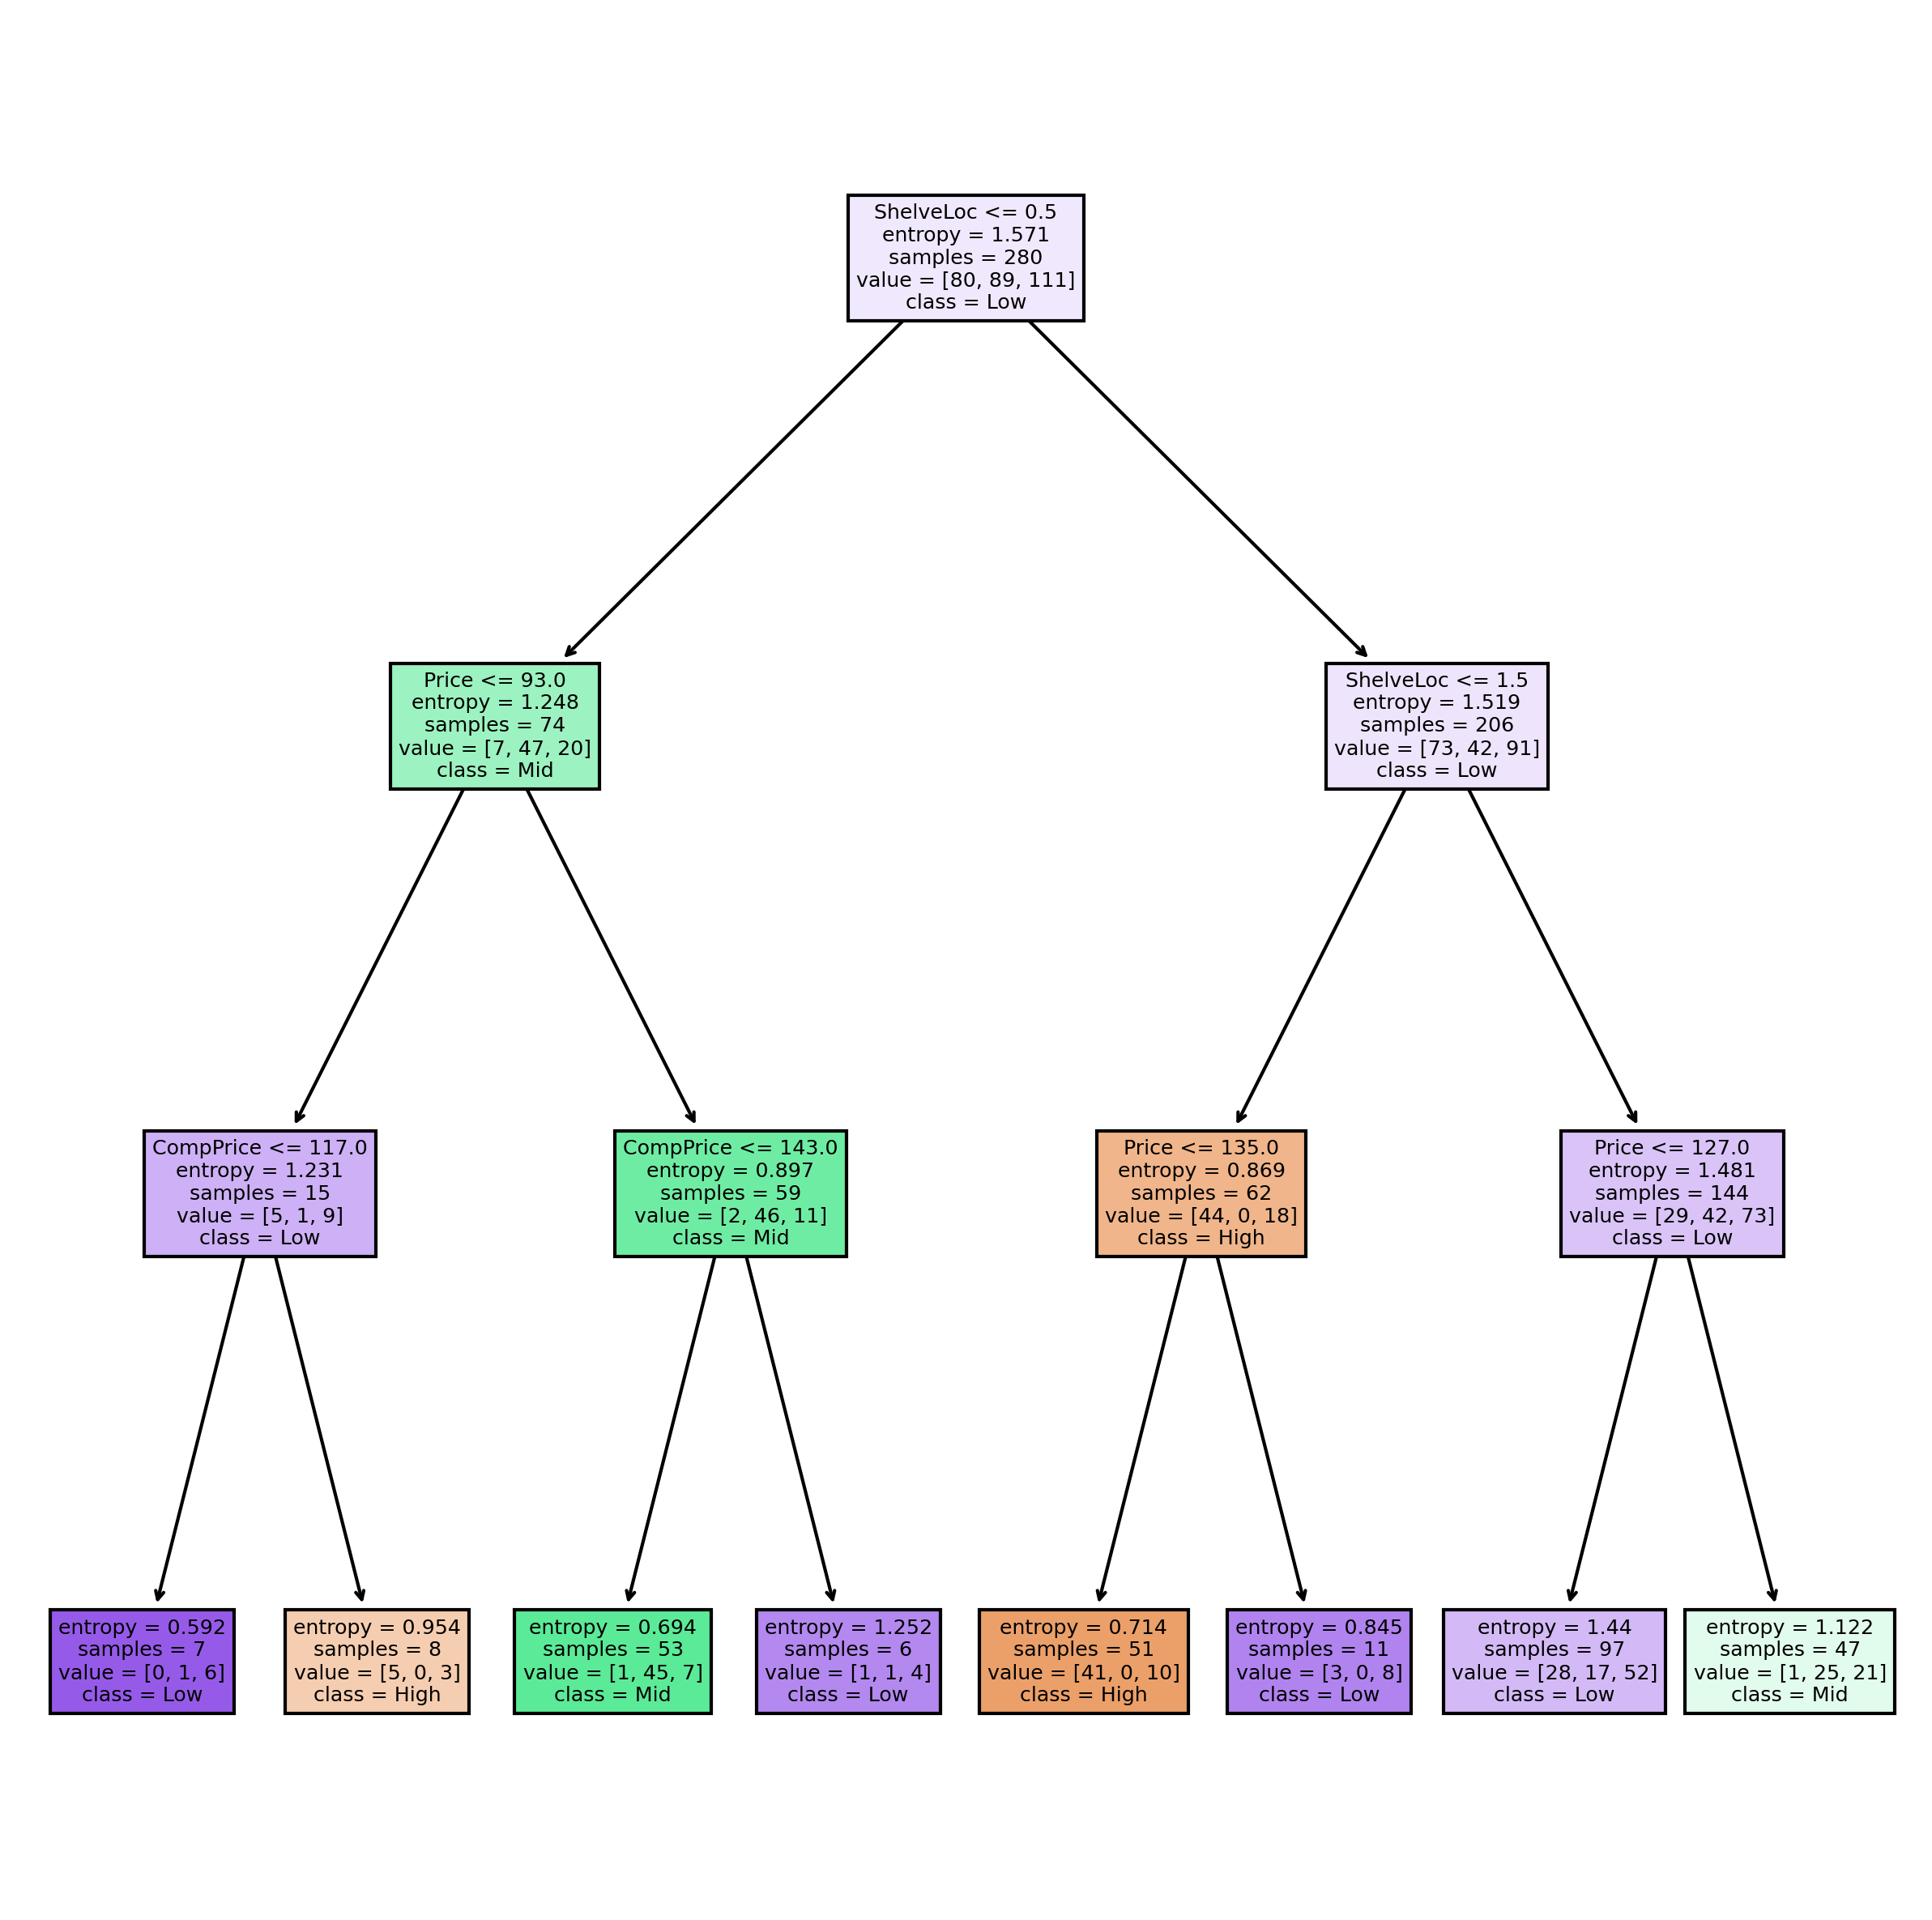

In [53]:
fn2= ['CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US']
cn2=['High','Mid','Low']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (10,10), dpi=300)
tree.plot_tree(model3,
               feature_names = fn2,
               class_names=cn2,
               filled = True);

In [54]:
pred3 = model3.predict(x_test)
pd.Series(pred3).value_counts()

Mid     64
Low     37
High    19
dtype: int64

In [55]:
np.mean(pred3==y2_test)

0.5333333333333333

In [ ]:
# here accuracy is 53%

In [ ]:
# amongst these 3 models we can pick model 2 as it is giving the highest accuracy
